In [ ]:
# # This file is part of Theano Geometry
#
# Copyright (C) 2017, Stefan Sommer (sommer@di.ku.dk)
# https://bitbucket.org/stefansommer/theanogemetry
#
# Theano Geometry is free software: you can redistribute it and/or modify
# it under the terms of the GNU General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.
#
# Theano Geometry is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU General Public License for more details.
#
# You should have received a copy of the GNU General Public License
# along with Theano Geometry. If not, see <http://www.gnu.org/licenses/>.
#

# LDDMM landmark dynamics

In [1]:
from src.manifolds.landmarks import *
M = landmarks(2)
print(M)

from src.plotting import *

2 landmarks in R^2 (dim 4). k_alpha=1, k_sigma=[[ 0.5  0. ]
 [ 0.   0.5]]


In [2]:
# Riemannian structure
from src.Riemannian import metric
metric.initialize(M)

WARNING (theano.tensor.blas): We did not found a dynamic library into the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


In [3]:
# example configuration
M.k_sigma.set_value(np.diag((.5,.5)))

q = np.vstack((np.linspace(-.5,.5,M.N.eval()),np.zeros(M.N.eval()))).T.flatten()
v = np.vstack((np.zeros(M.N.eval()),np.ones(M.N.eval()))).T.flatten()
p = M.flatf(q,v.flatten())
print("q = ", q)
print("p = ", p)

q =  [-0.5  0.   0.5  0. ]
p =  [ 0.          0.88079708  0.          0.88079708]


## Brownian Motion

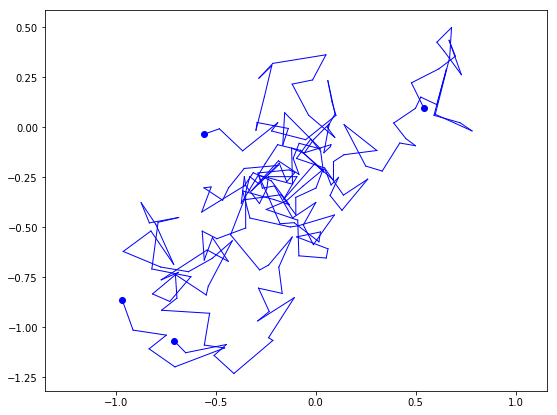

In [4]:
# coordinate form
from src.stochastics import Brownian_coords
Brownian_coords.initialize(M)

(ts,qs) = M.Brownian_coordsf(q,dWsf(M.dim.eval()))
M.plot()
M.plotx(qs)
plt.show()

## Development and Horizontal Vector Fields

### Development

In [4]:
from src.framebundle import FM
FM.initialize(M)

In [5]:
#M.rank.set_value(2)
n_steps.set_value(100)

# Landmarks
x = np.array([[0.,1.],[0.5,1.]]).flatten()
# Frame
u = np.array([[1.,0.,1.,0.],[-1.,-1.,1.,1.],[0.,1.,0.,1.],[-1.,0.,-1.,1.]]).reshape((M.dim.eval(),M.dim.eval())).T#.astype(theano.config.floatX)
u = M.gramSchmidt(x,u).T

q = np.hstack([x,u.flatten()])
print("q = ", q)

# Curve in R^2:
t = np.linspace(0,10,n_steps.get_value()+1)
gamma = np.vstack([[20*np.sin(t), t**2 + 2*t, 20*np.sin(t), 
                    t**2 + 2*t]]).T
dgamma = np.diff(gamma, axis = 0)
print("dgamma.shape =", dgamma.shape)

q =  [ 0.          1.          0.5         1.          0.89625071  0.
  0.89625071  0.         -0.31363567 -0.31363567  0.31363567  0.31363567
  0.          0.89625071  0.          0.89625071  0.31363567 -0.31363567
 -0.31363567  0.31363567]
dgamma.shape = (100, 4)


(100, 20)


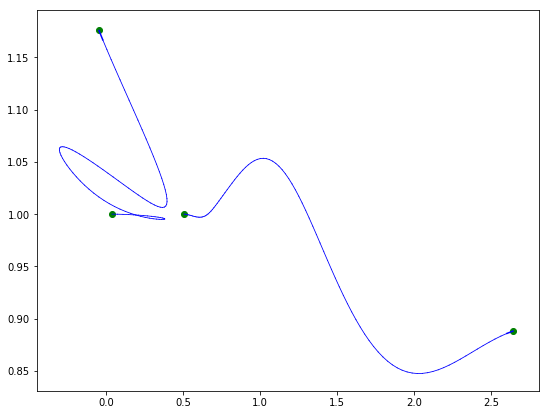

In [6]:
# Development dynamics
from src.stochastics import stochastic_development
stochastic_development.initialize(M)

# test deterministic development
qsv = M.devf(q,dgamma)
print(qsv.shape)
#newfig()
M.plotFMx(qsv,linewidth=1.5,s=50)
plt.show()

### Stochastic development:

In [ ]:
# Development dynamics
from src.stochastics import stochastic_development
stochastic_development.initialize(M)

In [7]:
M.rank.set_value(M.dim.eval())
n_steps.set_value(1000)

# Frame
x = np.array([[0,1],[0.5,1]]).flatten()
u = np.array([[1.,0.,1.,0.],[-1.,-1.,1.,1.],[0.,1.,0.,1.],[-1.,0.,-1.,1.]]).reshape((M.dim.eval(),M.dim.eval())).T#.astype(theano.config.floatX)
u = M.gramSchmidt(x,u).T

q = np.hstack([x,u.flatten()])
print("q = ", q)

m = 4
dWt = np.random.normal(0, np.sqrt(dt.eval()), (n_steps.get_value(),m))

drift = np.zeros(m)

q =  [ 0.          1.          0.5         1.          0.89625071  0.
  0.89625071  0.         -0.31363567 -0.31363567  0.31363567  0.31363567
  0.          0.89625071  0.          0.89625071  0.31363567 -0.31363567
 -0.31363567  0.31363567]


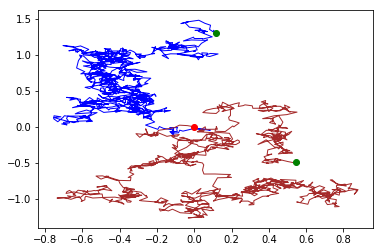

In [8]:
dZt = dWt + drift*dt.eval()
Zt = np.concatenate([np.zeros(m).reshape((1,m)),np.cumsum(dZt, axis = 0)])
plt.figure(figsize=(6,4))
plt.plot(Zt[:,0],Zt[:,1],'b-',linewidth = 1)
plt.plot(Zt[:,2],Zt[:,3], '-', color='brown',linewidth = 1)
plt.plot(0,0, 'ro')
plt.plot(Zt[-1,0],Zt[-1,1], 'go')
plt.plot(Zt[-1,2],Zt[-1,3], 'go')
plt.show()
#plt.savefig("/home/line/Dropbox/repos/theanodiffgeom-paper/paper/pictures/landstocdevfullR2.pdf")

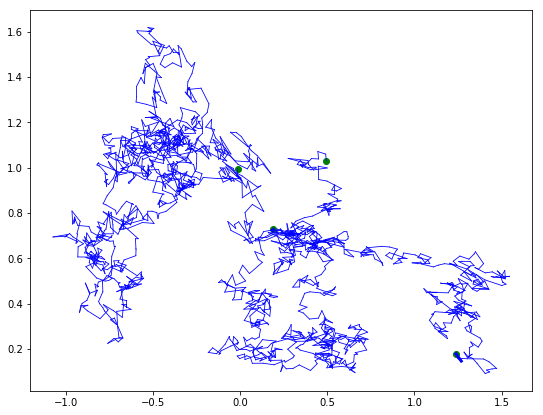

In [9]:
# test stochastic development
qsv = M.stoc_devf(q,dWt,drift)
M.plotFMx(qsv,N_vec = 0)
plt.show()
#plt.savefig("/home/line/Dropbox/repos/theanodiffgeom-paper/paper/pictures/landstocdevfull.pdf")